In [1]:
# Declaring path variables to make Basemap work in jupyter hub. Make sure that the conda environment path matches yours
import os
os.environ['PATH'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/bin:' + os.environ['PATH']
os.environ['PROJ_LIB'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/share/proj'

In [2]:
# General Tool Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap
import biota
import biota.plot as bpl
import seaborn as sns
import collections
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import math

from biota.database import (get_samples,
                            get_sample_data,
                            get_pg_connection,
                            get_data)
from biota.util import (rarefy,
                        make_tree,
                        get_dms,
                        filter_dm_and_map,
                        get_tax_table)
from IPython.core.display import display, HTML
from pickle import dump, load

import lasio

# SQL Query imports
from sqlalchemy import create_engine, engine, inspect

from functools import partial

from ipyparallel import Client
from sourcetracker import gibbs

# Clustering imports
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from skbio.stats.ordination import pcoa

from biota.util import assign_formations


%matplotlib inline

In [7]:
cwd = os.getcwd()
cwd

'/home/jovyan/APC local'

In [8]:
ProdData = pd.read_csv('/Final Presentation/SILVERTIP 76-7 UNIT A 1H_BHP DATA.csv')

FileNotFoundError: File b'/Final Presentation/SILVERTIP 76-7 UNIT A 1H_BHP DATA.csv' does not exist

In [5]:
#Create List of filenames
file_names = ['Silvertip A 1H.csv','Silvertip A 2H.csv','Silvertip A 3H.csv','Silvertip A 4H.csv','Silvertip A 5H.csv','Silvertip A 6H.csv','Silvertip A 7H.csv','Silvertip A 8H.csv',\
              'Silvertip A 9H.csv','Silvertip A 10H.csv','Silvertip B 2H.csv','Silvertip B 3H.csv']
well_names = ['STA1','STA2','STA3','STA4','STA5','STA6','STA7','STA8','STA9','STA10','STB2','STB3']

In [6]:
H1_df = pd.read_csv('Silvertip A 1H.csv')
H2_df= pd.read_csv('Silvertip A 2H.csv')
H3_df= pd.read_csv('Silvertip A 3H.csv')
H4_df= pd.read_csv('Silvertip A 4H.csv')
H5_df= pd.read_csv('Silvertip A 5H.csv')
H6_df= pd.read_csv('Silvertip A 6H.csv')
H7_df= pd.read_csv('Silvertip A 7H.csv')
H8_df= pd.read_csv('Silvertip A 8H.csv')
H9_df= pd.read_csv('Silvertip A 9H.csv')
H10_df= pd.read_csv('Silvertip A 10H.csv')
BH2_df= pd.read_csv('Silvertip B 2H.csv')
BH3_df= pd.read_csv('Silvertip B 3H.csv')

In [72]:
#Create List of Dataframes
#dataframes = []
#for filename in file_names:
#    dataframes.append(pd.read_csv(filename))
#    print(filename)

Silvertip A 1H.csv
Silvertip A 2H.csv
Silvertip A 3H.csv
Silvertip A 4H.csv
Silvertip A 5H.csv
Silvertip A 6H.csv
Silvertip A 7H.csv
Silvertip A 8H.csv
Silvertip A 9H.csv
Silvertip A 10H.csv
Silvertip B 2H.csv
Silvertip B 3H.csv


In [85]:
dfs = {}
for i in range(len(well_names)):
    well = well_names[i]
    filename = file_names[i]
    dfs[well] = pd.read_csv(filename)

In [ ]:
#for name, df in d.items():
    # operate on DataFrame 'df' for company 'name'

In [1]:
#for df in dfs.items():
#    dfs[df] = dfs[df].T
#    print(df)
#d = {}
#for well in well_names:
#    d[well] = pd.DataFrame()
#    print(well)
#for name in file_names:
#    wellname = 
#    d[name] = pd.read_csv(name)
#    print(name)

In [4]:
#Transpose Data
H1_df = H1_df.T
H2_df=H2_df.T
H3_df=H3_df.T
H4_df=H4_df.T
H5_df=H5_df.T
H6_df=H6_df.T
H7_df=H7_df.T
H8_df=H8_df.T
H9_df=H9_df.T
H10_df=H10_df.T
BH2_df=HB2_df.T
BH3_df=BH3_df.T


# Set col headers as row 1 values
H1_df.columns = H1_df.iloc[0]
H2_df.columns = H2_df.iloc[0]
H3_df.columns = H3_df.iloc[0]
H4_df.columns = H4_df.iloc[0]
H5_df.columns = H5_df.iloc[0]
H6_df.columns = H6_df.iloc[0]
H7_df.columns = H7_df.iloc[0]
H8_df.columns = H8_df.iloc[0]
H9_df.columns = H9_df.iloc[0]
H10_df.columns = H10_df.iloc[0]
BH2_df.columns = BH2_df.iloc[0]
BH3_df.columns = BH3_df.iloc[0]

#Rearrange Stages in DF
H1_df.insert(0, 'Stages', value = H1_df.index)

#Reset Index so Stage is a col
H1_df = H1_df.set_index('Well Name').copy()

#drop 1st row
H1_df = H1_df.drop(H1_df.index[0]).copy()

In [5]:
H1_df = H1_df.astype(float)

In [14]:
Variables = H1_df.columns

In [15]:
Variables

Index(['Stages', 'Top Perf', 'Bottom Perf', 'Num Perfs', 'Plug Depth', 'TVD',
       'Capacity Top Perf', 'Capacity Bottom Perf', 'Capacity Plug', 'Date',
       'IWHP', 'Break Pres', 'Start Time', 'End Time', 'Pump Time', 'Ave Rate',
       'Ave Pres', 'Max Rate', 'Max Pres', 'ISIP', 'FG', 'Design', 'Avg HHP',
       '15 minute SIP', '15% HCl Acid', 'Slickwater', 'Pump Down',
       'Total Fluid', '100 Mesh', 'Total Proppant', '100 Mesh',
       'Delivered Total Prop', 'Plexslick 957 gal', 'Chemplex 4-N-1 gal',
       'Payzone 845 gal', 'Payzone 850 gal', 'Payzone 217 gal',
       'Stim741 Gel gal', '15% HCl Acid gal'],
      dtype='object', name='Stage')

In [6]:
H1_df.head()

Stage,Stages,Top Perf,Bottom Perf,Num Perfs,Plug Depth,TVD,Capacity Top Perf,Capacity Bottom Perf,Capacity Plug,Date,...,Total Proppant,100 Mesh,Delivered Total Prop,Plexslick 957 gal,Chemplex 4-N-1 gal,Payzone 845 gal,Payzone 850 gal,Payzone 217 gal,Stim741 Gel gal,15% HCl Acid gal
Well Name,,,,,,,,,,,,,,,,,,,,,
Silvertip A 1H,1.0,23230.0,23392.0,24.0,23411.0,12540.0,423.5,425.9,426.2,43223.0,...,443960.0,443960.0,443960.0,511.0,7.0,99.0,38.0,99.0,30.0,1237.0
Silvertip A 1H,2.0,23029.0,23191.0,24.0,23210.0,12534.0,420.5,422.9,423.2,43224.0,...,248520.0,248520.0,248520.0,366.0,8.0,67.0,28.0,67.0,20.0,1264.0
Silvertip A 1H,3.0,22829.0,22990.0,24.0,23009.0,12531.0,417.5,419.9,420.2,43224.0,...,502480.0,502480.0,502480.0,570.0,7.0,111.0,42.0,111.0,20.0,1111.0
Silvertip A 1H,4.0,22628.0,22790.0,24.0,22809.0,12523.0,414.5,416.9,417.2,43225.0,...,504680.0,504680.0,504680.0,596.0,8.0,118.0,46.0,118.0,20.0,1251.0
Silvertip A 1H,5.0,22427.0,22589.0,32.0,22608.0,12509.0,411.5,413.9,414.2,43225.0,...,496340.0,496340.0,496340.0,503.0,7.0,102.0,38.0,102.0,20.0,1206.0


In [ ]:
#remove commas from dataset

#H1_df = H1_df.apply(lambda x: x.translate(None, string.punctuation))
#H1_df = H1_df.apply(lambda x: float(x.split()[0].replace(',', '')))

In [ ]:
print(H1_df.dtypes)

In [ ]:
x = H1_df["TVD, ft"]
y = H1_df["Average Rate, bpm"]

z = H1_df["Stages"]

In [8]:
H1_df.head()

Stage,Stages,Top Perf,Bottom Perf,Num Perfs,Plug Depth,TVD,Capacity Top Perf,Capacity Bottom Perf,Capacity Plug,Date,...,Total Proppant,100 Mesh,Delivered Total Prop,Plexslick 957 gal,Chemplex 4-N-1 gal,Payzone 845 gal,Payzone 850 gal,Payzone 217 gal,Stim741 Gel gal,15% HCl Acid gal
Well Name,,,,,,,,,,,,,,,,,,,,,
Silvertip A 1H,1.0,23230.0,23392.0,24.0,23411.0,12540.0,423.5,425.9,426.2,43223.0,...,443960.0,443960.0,443960.0,511.0,7.0,99.0,38.0,99.0,30.0,1237.0
Silvertip A 1H,2.0,23029.0,23191.0,24.0,23210.0,12534.0,420.5,422.9,423.2,43224.0,...,248520.0,248520.0,248520.0,366.0,8.0,67.0,28.0,67.0,20.0,1264.0
Silvertip A 1H,3.0,22829.0,22990.0,24.0,23009.0,12531.0,417.5,419.9,420.2,43224.0,...,502480.0,502480.0,502480.0,570.0,7.0,111.0,42.0,111.0,20.0,1111.0
Silvertip A 1H,4.0,22628.0,22790.0,24.0,22809.0,12523.0,414.5,416.9,417.2,43225.0,...,504680.0,504680.0,504680.0,596.0,8.0,118.0,46.0,118.0,20.0,1251.0
Silvertip A 1H,5.0,22427.0,22589.0,32.0,22608.0,12509.0,411.5,413.9,414.2,43225.0,...,496340.0,496340.0,496340.0,503.0,7.0,102.0,38.0,102.0,20.0,1206.0


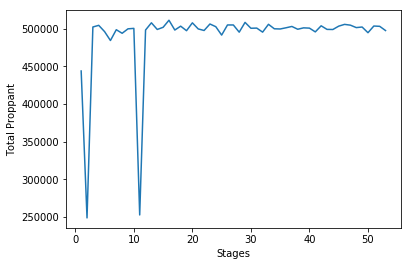

In [21]:

ax = sns.lineplot(H1_df['Stages'], H1_df['Total Proppant'])
#ax = sns.lineplot(H1_df['Stages'], H1_df['Total Proppant'])



In [ ]:
#drop 1st row
ProdData_T = ProdData_T.reindex(ProdData_T.index.drop('Stage'))

In [ ]:
Pro

In [ ]:
# Set col headers as row 1 values
#ProdData_T.columns = ProdData_T.iloc[0]

#drop 1st row
#ProdData_T = ProdData_T.reindex(ProdData_T.index.drop('Stage'))


In [ ]:
#Add Wellname to DF
#ProdData_T.insert(0, 'Well', '1H')

In [ ]:
#ProdData_T

In [ ]:
#ProdData_T.reset_index()
#ProdData_T["Stage"]

ax = sns.lineplot(x="Stage", y="Average Rate, bpm", data=ProdData_T)

